# Figure 4: The effect of noise versus weight decay on the norm of the weights during learning.

This notebook provides the code to produce Figure 2 in the paper: "Learning dynamics of linear denoising autoencoders". (ICML 2018)

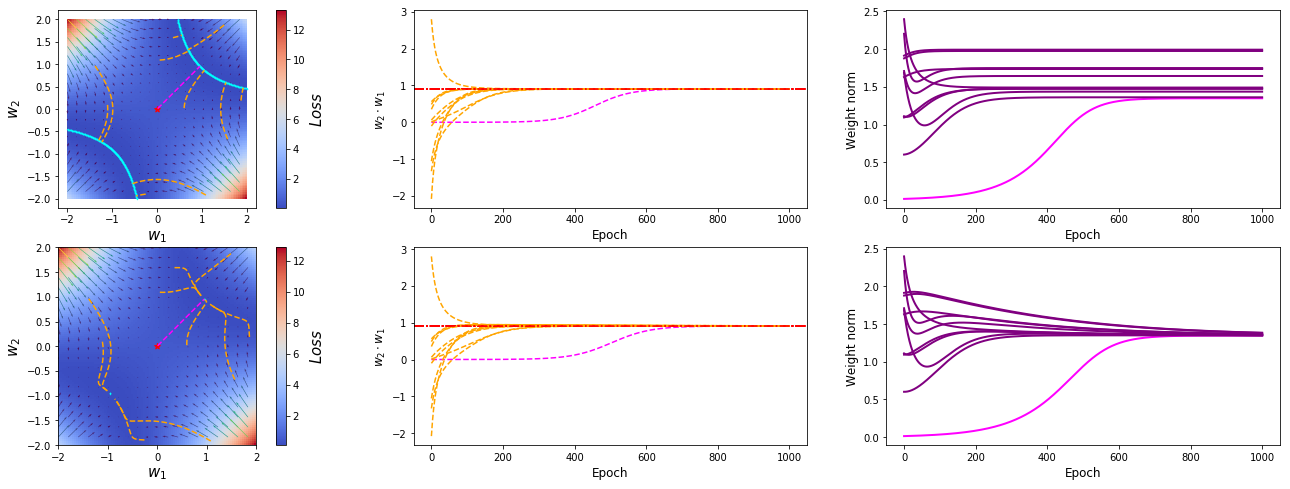

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# custom imports
from src.scalar_net.scalar_linear_net import ScalarNeuralNetwork
from src.scalar_net.optimisers import gradient_descent
from src.scalar_net.visualisations import plot_weight_norm
from src.scalar_net.visualisations import plot_learning_dynamics
from src.scalar_net.visualisations import plot_optimiser_trajectory_2d
from src.scalar_net.visualisations import plot_mse_loss_surface_2d
from src.scalar_net.visualisations import plot_global_minimum_manifold_2d

num_trials = 10
histories = []
weights = {'w1':[], 'w2':[]}
x = 1
l = 1
v_param = 0.1
sigmas = [v_param, 0]
regs = [0, (l*v_param)/(l + v_param)]
epochs = 1000
lr = 0.01

fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(2, 3, figsize = (24,8))
axes = [[ax1, ax2, ax3], [ax4, ax5, ax6]]
count = 0
for v, l2 in zip(sigmas, regs):
    ax_1 = axes[count][0]
    ax_2 = axes[count][1]
    ax_3 = axes[count][2]
    ax_1, settings = plot_mse_loss_surface_2d(fig, ax_1, x, l, v, l2)
    plot_global_minimum_manifold_2d(ax_1, settings)
    ax_2.set_xlabel('Epoch', fontsize=12)
    ax_2.set_ylabel('$w_2 \cdot w_1$', fontsize=12)
    histories = []
    for t in range(num_trials+1):
        np.random.seed(t*2)
        if t == 0:
            w1 = 0.01
            w2 = 0.01
            col1 = 'magenta'
            col2 = 'magenta'
        else:
            w1 = np.random.uniform(-2, 2)
            w2 = np.random.uniform(-2, 2)
            col1 = 'orange'
            col2 = 'purple'
        
        scalarNet = ScalarNeuralNetwork(seed=t)
        scalarNet.optimiser(gradient_descent)
        scalarNet.initialiser(w1=w1, w2=w2)
        scalarNet.train(x, y=l, n_epoch=epochs, learning_rate=lr, v=v, l2=l2, verbose=False)
        histories.append(scalarNet.history)
        weights['w1'].append(w1)
        weights['w2'].append(w2)
            
        # plot optimiser trajectory 
        plot_optimiser_trajectory_2d(ax_1, histories[t], c=col1, ls='--', label='GD path')
        plot_weight_norm(ax_3, histories[t], c=col2)
        plot_learning_dynamics(ax_2, histories[t], label='Simulation', c=col1, ls='--')
        ax_2.axhline(y=l/(l+v_param), color='r', linestyle='-.')
    count += 1
plt.show()

**Left**: Two-dimensional loss surface $\ell_\lambda = \frac{\lambda}{2}(1 - w_2w_1)^2 + \frac{\varepsilon}{2}(w_2w_1)^2 + \frac{\gamma}{2}(w^2_2+w^2_1)$. Gradient descent paths (orange/magenta dashed lines), minimum loss manifold (cyan curves), saddle point (red star). 

**Middle**: Simulated learning dynamics. 

**Right**: Norm of the weights over time for each simulated run. 

**Top**: Noise with $\lambda = 1, \varepsilon = 0.1$ and $\gamma = 0$. 

**Bottom**: Weight decay with $\lambda = 1, \varepsilon = 0$ and $\gamma = \lambda (0.1)/(\lambda + 0.1) = 0.091$. The magenta line in each plot corresponds to a simulated run with small initialised weights.